### K-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

### Reading and scalling the data

Testing different datasets - clean with all 79 columns, and final with two different selections of 15 most important features.

In [2]:
df = pd.read_parquet('./Local/2017_Final/Combined_1.parquet')
print(df.columns)

Index(['Label', 'Packet Length Std', 'Packet Length Variance',
       'Max Packet Length', 'Subflow Fwd Bytes', 'Avg Bwd Segment Size',
       'Destination Port', 'Average Packet Size', 'Bwd Packet Length Max',
       'Bwd Packet Length Std', 'Init_Win_bytes_forward',
       'Total Length of Bwd Packets', 'Total Length of Fwd Packets',
       'Subflow Bwd Bytes', 'Packet Length Mean', 'Bwd Packet Length Mean'],
      dtype='object')


In [3]:
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Running K-NN

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9954152154984762

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    858235
           1       0.69      0.97      0.80       788
           2       1.00      1.00      1.00     51582
           3       0.98      0.94      0.96      4042
           4       0.99      1.00      0.99     69311
           5       0.99      0.45      0.62      2168
           6       0.99      0.68      0.81      2068
           7       1.00      1.00      1.00      2371
           8       1.00      1.00      1.00         5
           9       1.00      0.46      0.63        13
          10       0.99      1.00      0.99     36371
          11       1.00      0.99      0.99      1253
          12       1.00      0.10      0.18       572
          13       0.00      0.00      0.00         7
          14       1.00      0.05      0.10       270

    accuracy                           1.00   1029056
   macro avg       0.91    

### Visualization
For high-dimensional data, PCA can be used to reduce it to 2 dimensions.

In [8]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

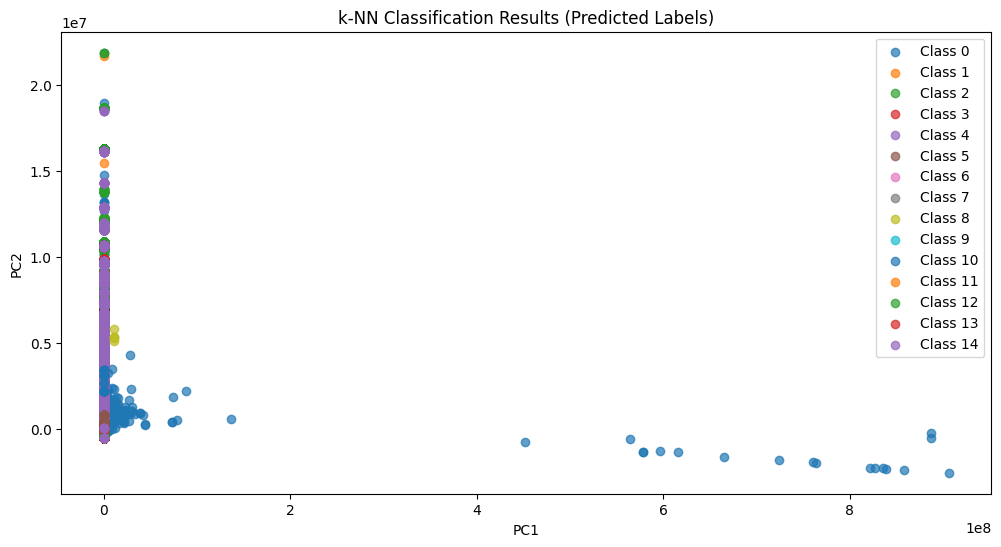

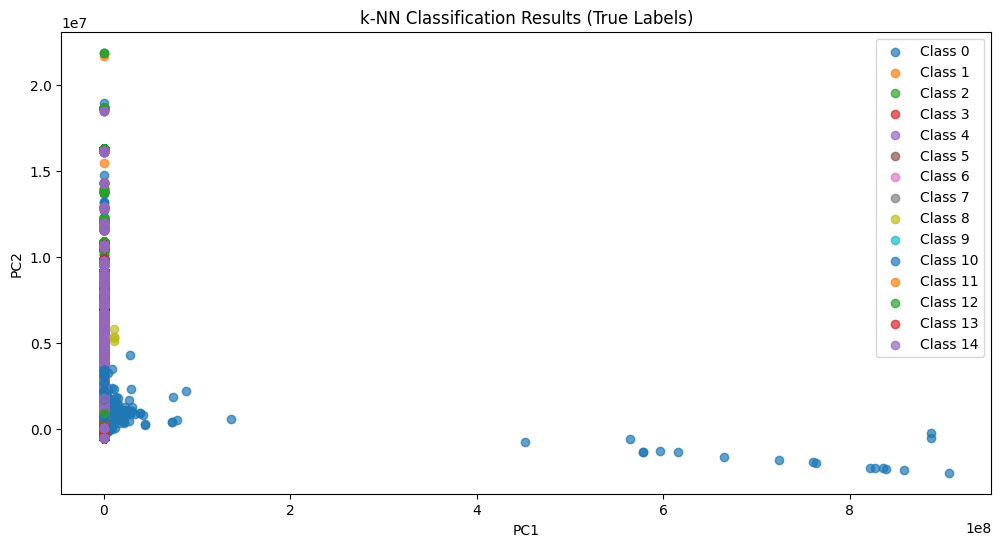

In [9]:
plt.figure(figsize=(12, 6))
for i in np.unique(y_pred):
    plt.scatter(X_test_pca[y_pred == i, 0], X_test_pca[y_pred == i, 1], label=f'Class {i}', alpha=0.7)
plt.title('k-NN Classification Results (Predicted Labels)')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.figure(figsize=(12, 6))
for i in np.unique(y_test):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=f'Class {i}', alpha=0.7)
plt.title('k-NN Classification Results (True Labels)')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()